<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
</p>



<h1>Métodos de K-means y GMM</h1>

<h2>Evaluación y Selección de Modelos</h2>

<h3>Curso Aprendizaje Automático Aplicado</h3>


<p> Julio Waissman Vilanova </p>


<a target="_blank" href="https://colab.research.google.com/github/mcd-unison/aaa-curso/blob/main/ejemplos/kmeans_GMM.ipynb"><img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;"  width="30" /> Ejecuta en Colab</a>


</center>


## 1. Introducción Teórica

En el aprendizaje no supervisado, no contamos con etiquetas de "verdad absoluta" (). Por ello, evaluamos la calidad del clustering basándonos en la **geometría** y la **probabilidad**.

### Objetivos del Clustering:

1. **Cohesión:** Minimizar la distancia intra-cluster.
2. **Separación:** Maximizar la distancia inter-cluster.


## 2. Métricas y Selección de  para K-Means

### A. El Método del Codo (Inercia)

La inercia o  (*Within-Cluster Sum of Squares*) mide la suma de las distancias al cuadrado de cada punto a su centroide:

$$WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

* **Criterio:** Buscamos el "punto de inflexión" donde la ganancia de información deja de ser significativa.

### B. Coeficiente de Silueta

Mide qué tan similar es un objeto a su propio cluster en comparación con otros clusters. El valor $s(i)$ va de -1 a 1:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Donde:

* $a(i)$: Distancia media intra-cluster.
* $b(i)$: Distancia media al cluster vecino más cercano.

## 3. Selección de Componentes en Mezcla de Gaussianas (GMM)

A diferencia de K-Means, GMM usa verosimilitud (). Para evitar el sobreajuste, usamos criterios de información que penalizan la complejidad del modelo.

* **AIC (Akaike Information Criterion):** $$AIC = 2p - 2\ln(L)$$ 
* **BIC (Bayesian Information Criterion):** $$BIC = \ln(n)p - 2\ln(L)$$

Donde:
* $p$: Número de parámetros en el modelo.
* $L$: Verosimilitud máxima del modelo.
* $n$: Número de observaciones.

> **Nota:** Preferimos el modelo con el **BIC/AIC más bajo**. El BIC penaliza más fuertemente los modelos complejos.

## 4. Ejemplo de uso de K-Means vs GMM

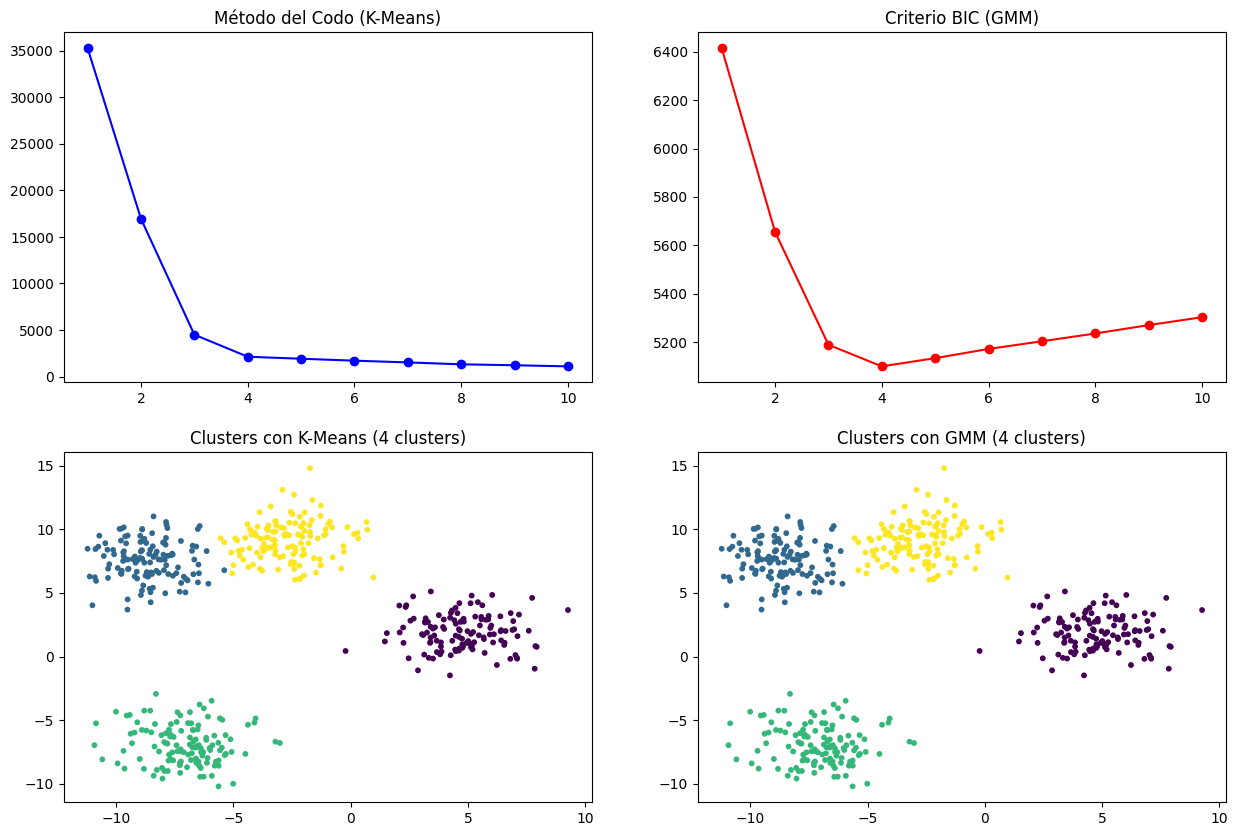

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# 1. Generación de datos sintéticos (4 grupos)
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=42)

# 2. Comparación de métricas (Codo vs BIC)
n_clusters = range(1, 11)
inertias = []
bics = []

for k in n_clusters:
    # K-Means
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    inertias.append(km.inertia_)
    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42).fit(X)
    bics.append(gmm.bic(X))

# Visualización
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].plot(n_clusters, inertias, 'bo-')
ax[0,0].set_title('Método del Codo (K-Means)')

ax[0,1].plot(n_clusters, bics, 'ro-')
ax[0,1].set_title('Criterio BIC (GMM)')

# Visualizar si se encuentran 4 clusters
km = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = km.fit_predict(X)
ax[1,0].scatter(X[:,0], X[:,1], c=clusters, s=10, cmap='viridis')
ax[1,0].set_title('Clusters con K-Means (4 clusters)')

gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(X)
ax[1,1].scatter(X[:,0], X[:,1], c=clusters, s=10, cmap='viridis')
ax[1,1].set_title('Clusters con GMM (4 clusters)')

plt.show()

K-Means falla con formas no circulares. GMM brilla aquí.

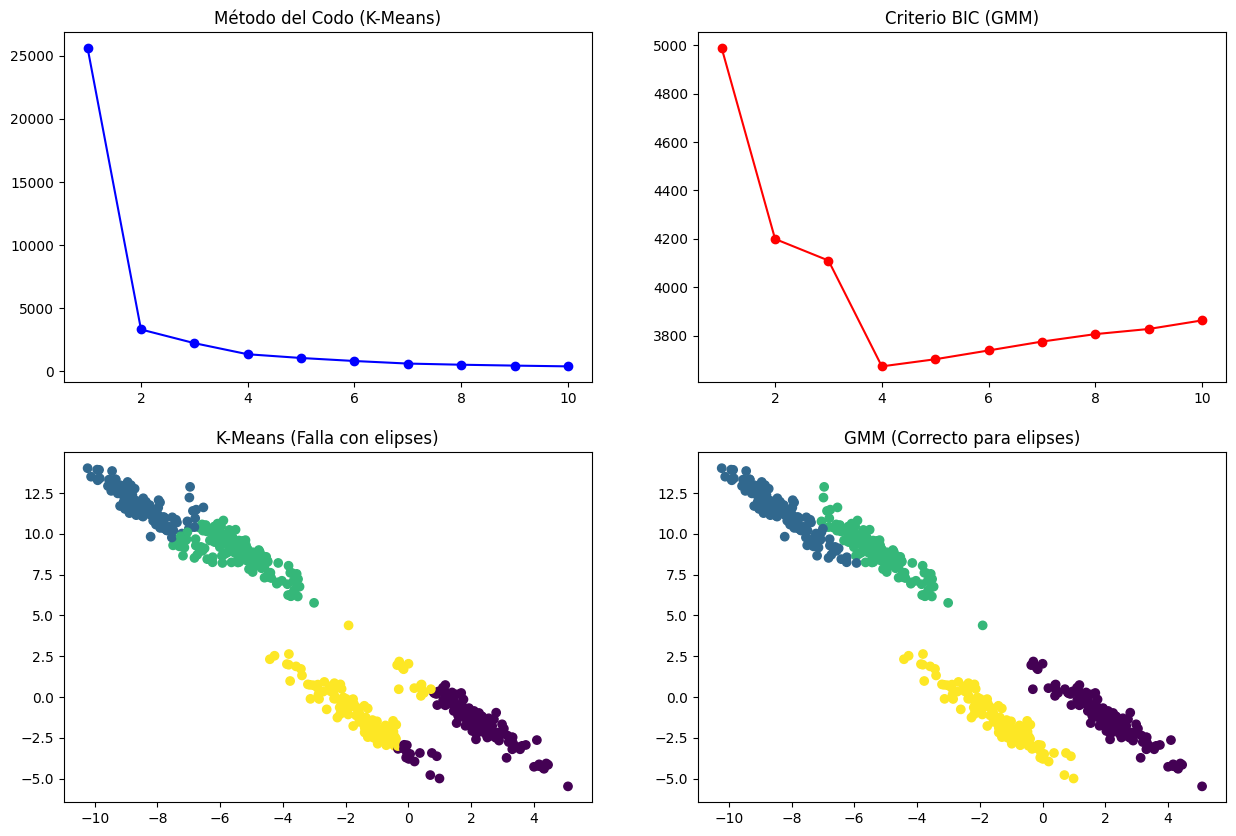

In [21]:
import numpy as np

# Transformación de datos a elipses
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_stretched = np.dot(X, transformation)

n_clusters = range(1, 11)
inertias = []
bics = []

for k in n_clusters:
    # K-Means
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_stretched)
    inertias.append(km.inertia_)
    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42).fit(X_stretched)
    bics.append(gmm.bic(X_stretched))

# Visualización
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].plot(n_clusters, inertias, 'bo-')
ax[0,0].set_title('Método del Codo (K-Means)')

ax[0,1].plot(n_clusters, bics, 'ro-')
ax[0,1].set_title('Criterio BIC (GMM)')

# Ajuste de modelos a 4 clusters
km = KMeans(n_clusters=4, random_state=42)
km_labels = km.fit_predict(X_stretched)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_stretched)

ax[1,0].scatter(X_stretched[:, 0], X_stretched[:, 1], c=km_labels, cmap='viridis')
ax[1,0].set_title("K-Means (Falla con elipses)")

ax[1,1].scatter(X_stretched[:, 0], X_stretched[:, 1], c=gmm_labels, cmap='viridis')
ax[1,1].set_title("GMM (Correcto para elipses)")
plt.show()

## 5. El método de silueta para K-Means

El **Método de la Silueta** es mucho más informativo que el del codo, porque no solo te da un número, sino que te "muestra" visualmente qué tan bien encaja cada punto en su grupo.

> *El codo te dice dónde deja de doler el error, pero la silueta te dice qué tan feliz está cada dato en su cluster*.

![Silhouette Example](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_005.png)

Recordemos la fórmula para un dato individual :

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Donde:

* $a(i)$: Cohesión (distancia media a los de su propio grupo). **Queremos que sea pequeña.**
* $b(i)$: Separación (distancia media a los del grupo vecino más cercano). **Queremos que sea grande.**

### ¿Cómo leer un gráfico de silueta?

Un gráfico de silueta muestra una "cuchilla" o "ala" por cada cluster. Debemos fijarnos en tres cosas:

1. **El grosor:** Representa cuántos puntos tiene el cluster.
2. **La longitud (Score):** Qué tan lejos llega hacia el 1.0.
3. **La línea punteada:** Es el promedio total. Queremos que todas las "cuchillas" superen esa línea y que no haya valores negativos (puntos mal asignados).

Vamos a usar el famoso dataset Iris (solo las características) para ver cuál es el número óptimo según esta métrica, si 2, 3 o 4 clusters.


Para k=2, el score de silueta promedio es: 0.681


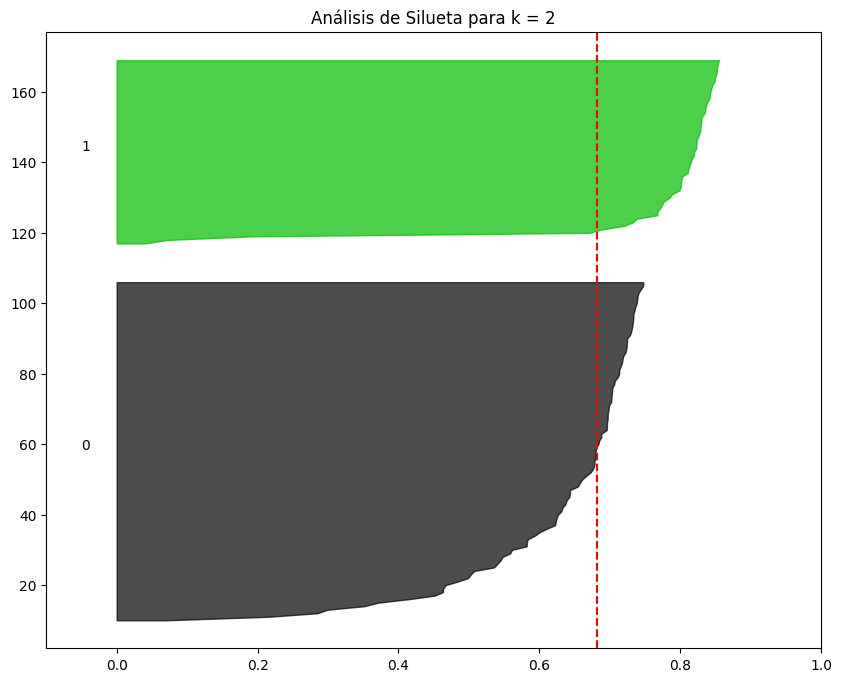

Para k=3, el score de silueta promedio es: 0.551


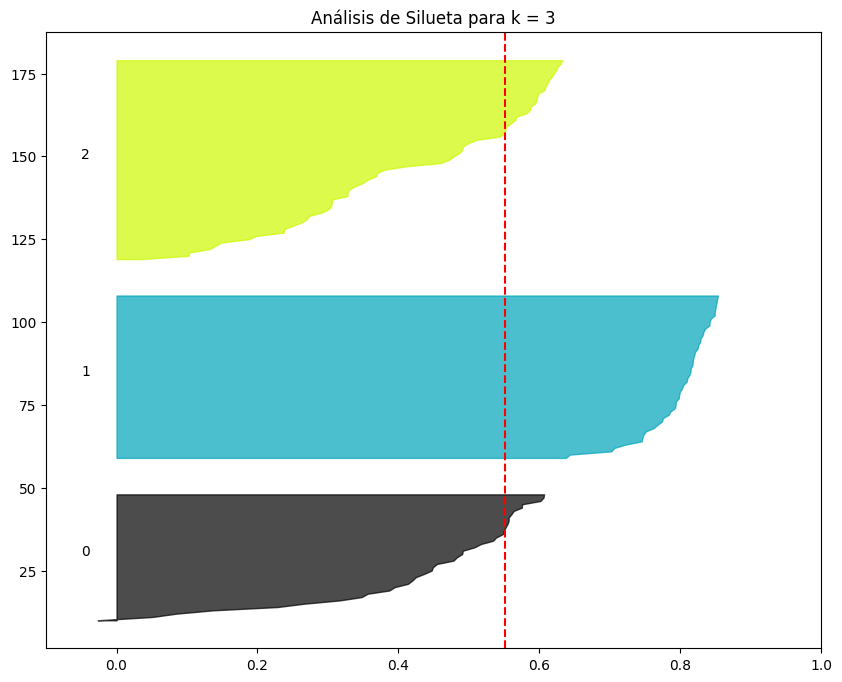

Para k=4, el score de silueta promedio es: 0.495


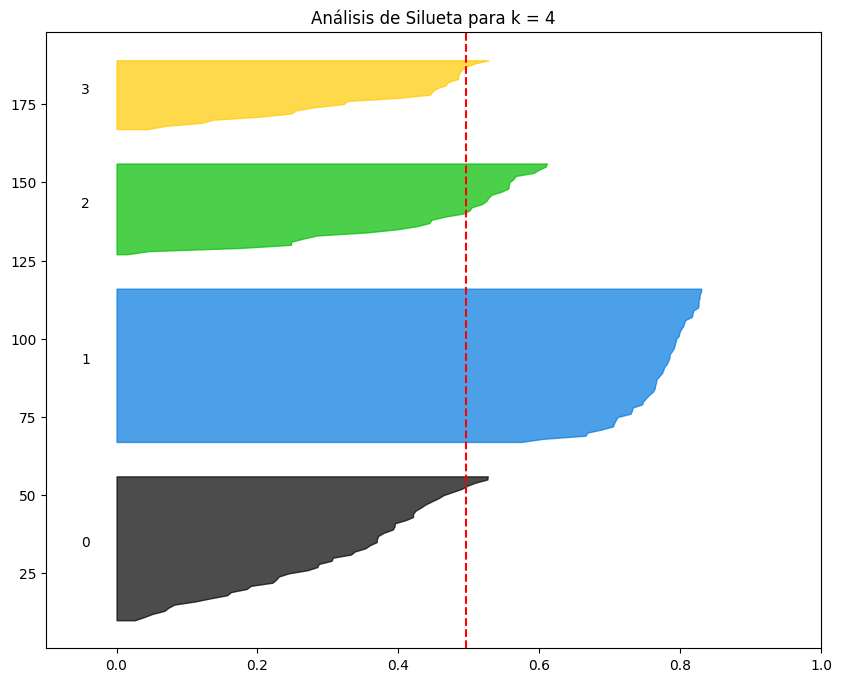

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris

# Cargamos datos
data = load_iris()
X = data.data
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Crear el gráfico
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))

    # El gráfico de silueta va de -0.1 a 1
    ax1.set_xlim([-0.1, 1])
    
    # Ajustamos el modelo
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init="auto")
    cluster_labels = clusterer.fit_predict(X)

    # Calculamos el score promedio
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Para k={n_clusters}, el score de silueta promedio es: {silhouette_avg:.3f}")

    # Calculamos los scores de silueta para CADA muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agrupamos y ordenamos los scores de los puntos del cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetamos el cluster en el centro
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title(f"Análisis de Silueta para k = {n_clusters}")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # Promedio
    plt.show()

1. **Para 2 clusters:** El score es altísimo (~0.68). Visualmente, las dos "cuchillas" son muy limpias y superan la media. Esto es porque una de las especies de Iris está muy separada de las otras dos.
2. **Para 3 clusters:** El score baja un poco (~0.55). Verán que una de las "cuchillas" (el cluster 1 y 2) tienen algunos puntos con silueta muy baja o incluso negativa. Esto nos dice que esas dos clases se solapan en la realidad.
3. **Para 4 clusters:** El score baja aún más (~0.50). Aquí vemos que una "cuchilla" es muy delgada (pocos puntos) y otra tiene muchos puntos negativos. Esto indica que el modelo está forzando una separación que no existe naturalmente.

**Veredicto:** Aunque sabemos que hay 3 especies de flores, matemáticamente  es una separación más "sólida" desde el punto de vista de la geometría.

### ¿Cuándo sospechar de tu clustering?

* Si una "cuchilla" es mucho más delgada que las demás (clusters desbalanceados).
* Si muchas muestras están por debajo de 0 (están en el cluster equivocado).
* Si ninguna "cuchilla" alcanza la línea roja del promedio.


## 6. El método de silueta para detección de outliers

El método de silueta no solo ayuda a evaluar la calidad del clustering, sino que también puede ser una herramienta útil para detectar outliers dentro de los clusters.

Recordemos que si $s(i)<0$, significa que la distancia promedio al cluster vecino ($b(i)$) es menor que la distancia a los puntos de su propio cluster ($a(i)$). Es decir, el punto está *atrapado* en el grupo erróneo o está tan lejos de todo que no encaja en ningún lado.

> *Un score de silueta negativo es un grito de auxilio de un dato que fue asignado al grupo equivocado.*

Vamos a crear 3 clusters definidos y añadiremos manualmente unos puntos aleatorios que estén en *tierra de nadie*.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs

# Generamos 3 grupos limpios
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1, random_state=42)

# Añadimos 5 "outliers" manuales en zonas atípicas
outliers = np.array([[0, 0], [4, 10], [-2, -1], [2, -7.5], [-6, 2.5]])
X_with_outliers = np.vstack([X, outliers])

# Ajustamos K-Means (sabemos que k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X_with_outliers)

Ahora, usaremos `silhouette_samples` para obtener el score de cada punto y filtraremos aquellos que tengan un rendimiento pobre.

Se detectaron 4 puntos con silueta negativa o baja.


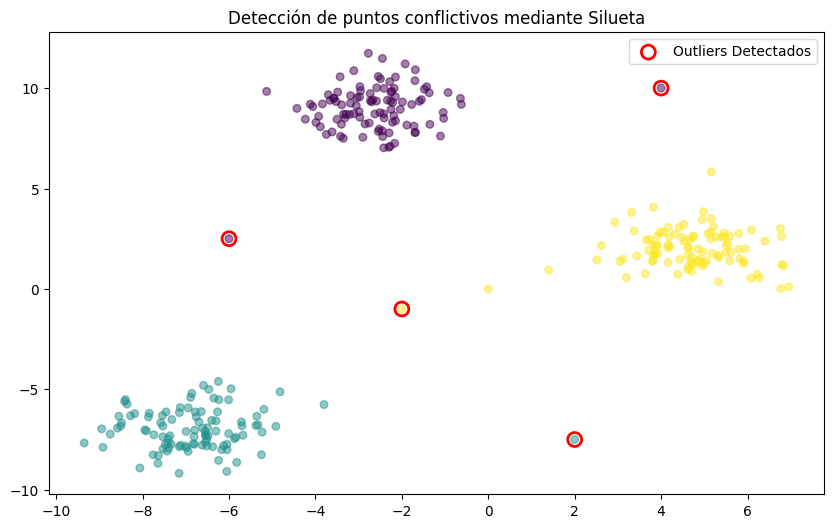

In [46]:
# Calculamos la silueta para CADA punto
sample_scores = silhouette_samples(X_with_outliers, labels)

# Identificamos puntos con silueta negativa o baja (ej. < 0.3)
outlier_idx = np.where(sample_scores < .3)[0]

print(f"Se detectaron {len(outlier_idx)} puntos con silueta negativa o baja.")

# Visualización
plt.figure(figsize=(10, 6))
# Puntos normales
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=labels, s=30, cmap='viridis', alpha=0.5)
# Resaltamos los outliers detectados
plt.scatter(X_with_outliers[outlier_idx, 0], X_with_outliers[outlier_idx, 1], 
            edgecolor='red', facecolor='none', s=100, linewidth=2, label='Outliers Detectados')

plt.title("Detección de puntos conflictivos mediante Silueta")
plt.legend()
plt.show()

¿Por qué es útil esto?

- **Limpieza de Datos:** Puedes usar este método para eliminar ruidos antes de entrenar un modelo supervisado basado en estos clusters.

- **Refinamiento de Fronteras:** A veces el punto no es un outlier, sino que está en la frontera exacta entre dos grupos. La silueta te avisa que esa zona es ambigua.

- **Evaluación de la Densidad:** Si tienes muchos puntos con silueta baja, quizás K-Means no es el algoritmo adecuado y deberías usar uno basado en densidad como DBSCAN.


> *Si un dato tiene silueta negativa, K-Means lo obligó a pertenecer a un grupo solo porque no permite dejar datos sin etiqueta. En la vida real, a veces es mejor admitir que un dato no pertenece a nada (ruido)*.

## Un ejemplo *práctico* de K-Mean y GMM

La segmentación de clientes es el *hola mundo* del aprendizaje no supervisado en la industria. Aquí es donde los números se convierten en estrategias de negocio.

Para este ejercicio, utilizaremos el dataset *Mall Customer Segmentation*, que es un estándar para aprender a identificar perfiles de consumidores basados en sus ingresos y hábitos de gasto.

En K-Means y GMM, la escala lo es todo. Si una variable tiene un rango de $0-100$ y otra de $0-100,000$, la de mayor rango dominará la distancia euclidiana.

Vamos a descargar y estandarizar los datos primero.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Cargamos el dataset desde un repositorio público
url = "https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/refs/heads/master/Mall_Customers.csv"
df = pd.read_csv(url)

# Seleccionamos las variables clave: Annual Income y Spending Score
X = df.iloc[:, [3, 4]].values

# ¡Paso Crucial!: Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset cargado: {X.shape[0]} clientes listos para segmentar.")

Dataset cargado: 200 clientes listos para segmentar.


Ahora vamos a utilizar ambos métodos de K-Means para determinar el número óptimo de clusters.

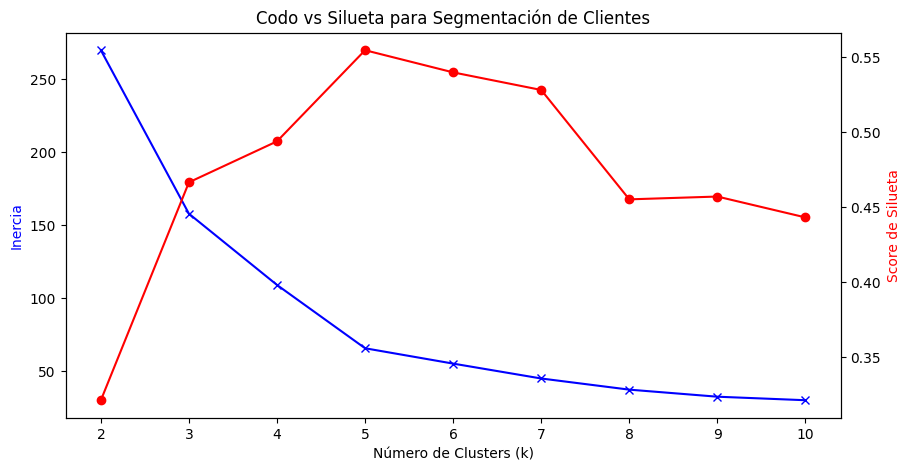

In [50]:
inertias = []
silhouettes = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Graficamos ambos criterios
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(k_range, inertias, 'bx-', label='Inercia (Codo)')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia', color='b')

ax2 = ax1.twinx()
ax2.plot(k_range, silhouettes, 'ro-', label='Silueta')
ax2.set_ylabel('Score de Silueta', color='r')

plt.title('Codo vs Silueta para Segmentación de Clientes')
plt.show()

¿Y si los grupos de clientes se solapan? Usaremos GMM para ver si el BIC coincide con lo que encontramos en K-Means.

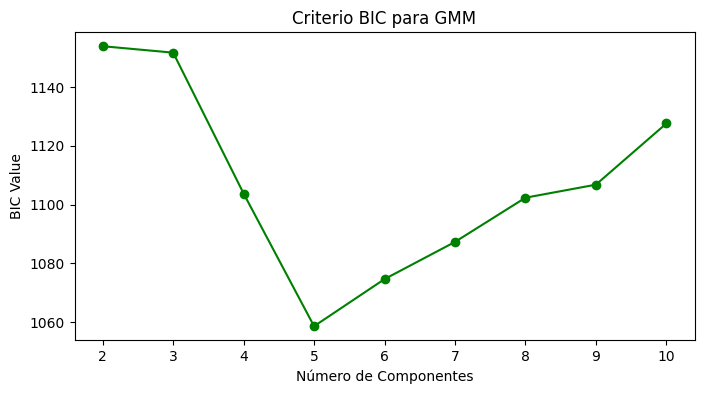

In [51]:
bics = []
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

plt.figure(figsize=(8, 4))
plt.plot(k_range, bics, 'go-')
plt.title('Criterio BIC para GMM')
plt.xlabel('Número de Componentes')
plt.ylabel('BIC Value')
plt.show()

De acuerdo a los dos métodos, el número óptimo de clusters es 5. Ahora, veamos cómo se ven esos segmentos en el espacio real.

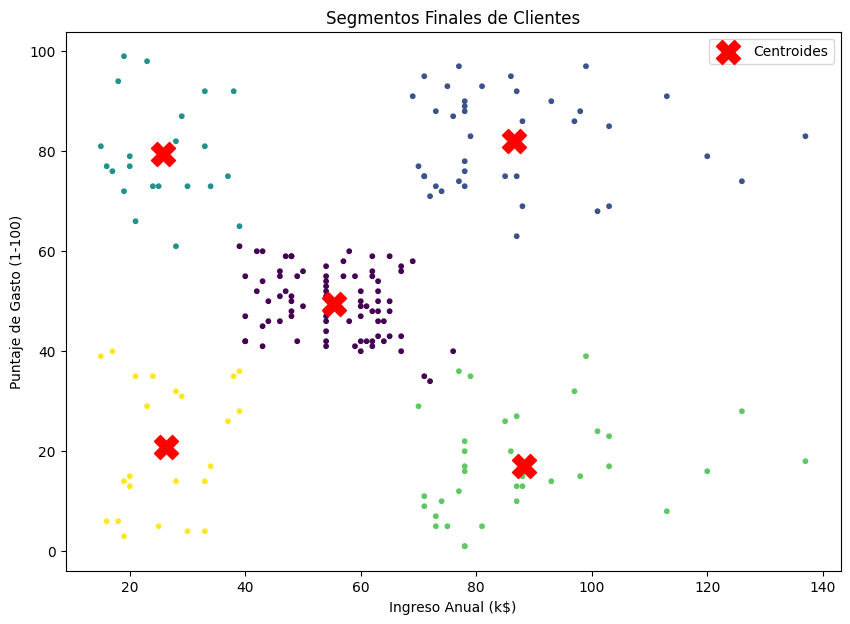

In [55]:
# Aplicamos el modelo final
model = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = model.fit_predict(X_scaled)

# Visualización rica en información
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=10)
plt.scatter(scaler.inverse_transform(model.cluster_centers_)[:, 0], 
            scaler.inverse_transform(model.cluster_centers_)[:, 1], 
            s=300, c='red', marker='X', label='Centroides')

plt.title('Segmentos Finales de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.show()

Al observar el gráfico final, podemos nombrar a nuestros grupos:

- **Grupo de Valor (Arriba-Derecha):** Altos ingresos, alto gasto. (Clientes VIP).
- **Grupo Objetivo (Abajo-Derecha):** Altos ingresos, bajo gasto. (Potencial de crecimiento).
- **Grupo Promedio (Centro):** Ingresos y gastos moderados.
- **Grupo Frugal (Abajo-Izquierda):** Bajos ingresos, bajo gasto.
- **Grupo Impulsivo (Arriba-Izquierda):** Bajos ingresos, alto gasto.

¿Qué pasaría si intentamos segmentar usando también la Edad? La silueta podría bajar porque añadir más dimensiones suele "dispersar" los puntos.